### movie_reviews dataset
## Data Exploration

In [17]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#print("the length of movie_reviews is:" len(movie_reviews))

print(movie_reviews.categories())
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
print(len(documents))
#print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words_f = nltk.FreqDist(all_words)
print(all_words_f.most_common(15))
print(all_words_f["stupid"])


['neg', 'pos']
2000
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
253


In [21]:
word_features = list(all_words_f.keys())[:3000]
print(word_features)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'", 's', 'deal', '?', 'watch', 'movie', '"', 'sorta', 'find', 'out', 'critique', 'mind', '-', 'fuck', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'didn', 't', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'to

In [25]:
# remove the stopwords

import string

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in all_words if not w in stop_words and w not in string.punctuation]
filtered_words_f = nltk.FreqDist(filtered_words)
print(filtered_words_f.most_common(15))

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906)]


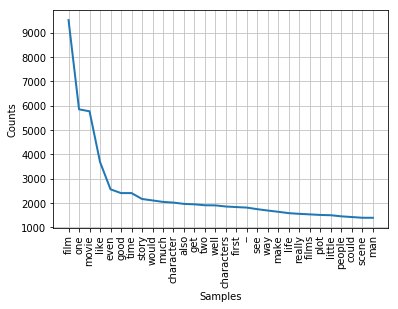

In [26]:
filtered_words_f.plot(30)

In [27]:
#这里补上文本的长度
# inspecting the dataset a little more for sentence length
def find_length(text):
    leng=len(text)
    return leng
        
sentence_lengths = [find_length(rev) for (rev, category) in documents]
print(max(sentence_lengths))


2879


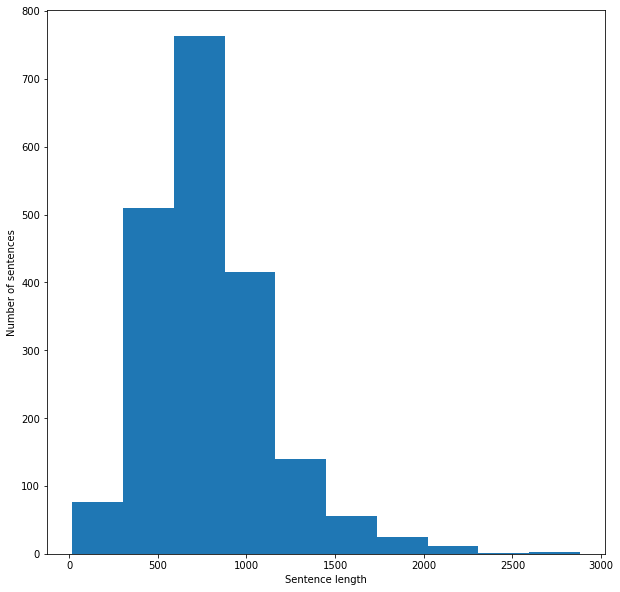

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

## Data Preprocessing

#### Converting words to Features with NLTK


In [29]:

# get the most 3000 common words
word_features = list(filtered_words_f.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

print((find_features(movie_reviews.words('pos/cv004_11636.txt'))))


{'plot': True, 'two': True, 'teen': False, 'couples': False, 'go': True, 'church': False, 'party': False, 'drink': False, 'drive': False, 'get': False, 'accident': False, 'one': True, 'guys': True, 'dies': False, 'girlfriend': False, 'continues': False, 'see': True, 'life': False, 'nightmares': False, 'deal': False, 'watch': False, 'movie': True, 'sorta': False, 'find': False, 'critique': False, 'mind': False, 'fuck': False, 'generation': False, 'touches': False, 'cool': False, 'idea': False, 'presents': False, 'bad': False, 'package': False, 'makes': False, 'review': False, 'even': True, 'harder': False, 'write': False, 'since': False, 'generally': False, 'applaud': False, 'films': True, 'attempt': False, 'break': False, 'mold': False, 'mess': False, 'head': False, 'lost': True, 'highway': False, 'memento': False, 'good': False, 'ways': False, 'making': False, 'types': False, 'folks': False, 'snag': False, 'correctly': False, 'seem': False, 'taken': False, 'pretty': False, 'neat': Fal

In [ ]:
# get the featuresets for training datasets and testing datasets.
featuresets = [(find_features(rev), category) for (rev, category) in documents]

training_set = featuresets[:1900]

# set that we'll test against.
testing_set = featuresets[1900:]

In [31]:

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 77.0
Most Informative Features
                   sucks = True              neg : pos    =     17.2 : 1.0
              schumacher = True              neg : pos    =     11.8 : 1.0
               atrocious = True              neg : pos    =     11.1 : 1.0
                  stinks = True              neg : pos    =      9.8 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                 frances = True              pos : neg    =      8.9 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
             silverstone = True              neg : pos    =      7.7 : 1.0
                  kombat = True              neg : pos    =      7.1 : 1.0
                    mena = True              neg : pos    =      7.1 : 1.0
                  suvari = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
                  regard = True         

## Implementation

In [32]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB



from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 77.0
Most Informative Features
                   sucks = True              neg : pos    =     17.2 : 1.0
              schumacher = True              neg : pos    =     11.8 : 1.0
               atrocious = True              neg : pos    =     11.1 : 1.0
                  stinks = True              neg : pos    =      9.8 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                 frances = True              pos : neg    =      8.9 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
             silverstone = True              neg : pos    =      7.7 : 1.0
                  kombat = True              neg : pos    =      7.1 : 1.0
                    mena = True              neg : pos    =      7.1 : 1.0
                  suvari = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
                  regard 

## Refinement

In [33]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers


    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf  

In [34]:
voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


voted_classifier accuracy percent: 83.0
